### Data Description

In this part of this exercise, you will implement linear regression with one
variable to predict prots for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering dierent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("ex1data1.csv")

In [3]:
df

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       97 non-null     float64
 1   Y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
df.columns

Index(['X', 'Y'], dtype='object')

### Data Visualization

### Bivariate Data Exploration

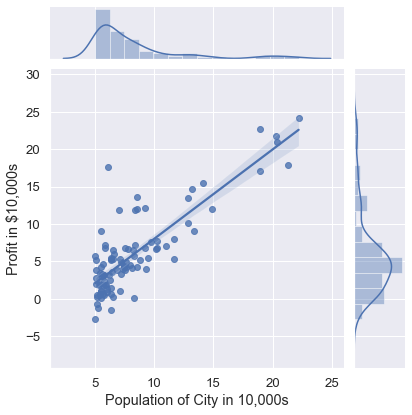

In [7]:
sns.jointplot(x='X', y='Y',data=df, kind='reg')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### Linear Regression

In [8]:
df.columns

Index(['X', 'Y'], dtype='object')

In [9]:
y = df['Y']
x1 = df['X']

In [10]:
x = sm.add_constant(x1)

In [11]:
results = sm.OLS(y,x).fit()

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.02e-26
Time:                        20:36:27   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8958      0.719     -5.415      0.000      -5.324      -2.467
X              1.1930      0.080     14.961      0.000       1.035       1.351
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. 
The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [13]:
df2 = pd.read_csv("ex1data2.csv")

In [14]:
df2

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [15]:
scaler = StandardScaler()

In [16]:
df3 = scaler.fit_transform(df2)

In [17]:
df3

array([[ 0.13141542, -0.22609337,  0.48089023],
       [-0.5096407 , -0.22609337, -0.08498338],
       [ 0.5079087 , -0.22609337,  0.23109745],
       [-0.74367706, -1.5543919 , -0.87639804],
       [ 1.27107075,  1.10220517,  1.61263744],
       [-0.01994505,  1.10220517, -0.32750064],
       [-0.59358852, -0.22609337, -0.20624201],
       [-0.72968575, -0.22609337, -1.1431751 ],
       [-0.78946678, -0.22609337, -1.03807621],
       [-0.64446599, -0.22609337, -0.791517  ],
       [-0.0771822 ,  1.10220517, -0.81173485],
       [-0.000866  , -0.22609337,  0.05325146],
       [-0.14077904, -0.22609337, -0.08418307],
       [ 3.15099326,  2.4305037 ,  2.90606282],
       [-0.9319237 , -0.22609337, -0.65085698],
       [ 0.38071502,  1.10220517,  0.88508566],
       [-0.86578299, -1.5543919 , -0.32750064],
       [-0.97262567, -0.22609337, -1.1358915 ],
       [ 0.77374348,  1.10220517,  1.29007331],
       [ 1.31050078,  1.10220517,  2.09039644],
       [-0.29722726, -0.22609337, -0.707

In [18]:
df4 = pd.DataFrame(df3, columns=df2.columns)

In [19]:
df4

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637
5,-0.019945,1.102205,-0.327501
6,-0.593589,-0.226093,-0.206242
7,-0.729686,-0.226093,-1.143175
8,-0.789467,-0.226093,-1.038076
9,-0.644466,-0.226093,-0.791517


In [20]:
df4.shape

(47, 3)

In [21]:
X = df4.iloc[:,0:2]
y = df4.iloc[:,2]

In [22]:
X.values, y.values

(array([[ 0.13141542, -0.22609337],
        [-0.5096407 , -0.22609337],
        [ 0.5079087 , -0.22609337],
        [-0.74367706, -1.5543919 ],
        [ 1.27107075,  1.10220517],
        [-0.01994505,  1.10220517],
        [-0.59358852, -0.22609337],
        [-0.72968575, -0.22609337],
        [-0.78946678, -0.22609337],
        [-0.64446599, -0.22609337],
        [-0.0771822 ,  1.10220517],
        [-0.000866  , -0.22609337],
        [-0.14077904, -0.22609337],
        [ 3.15099326,  2.4305037 ],
        [-0.9319237 , -0.22609337],
        [ 0.38071502,  1.10220517],
        [-0.86578299, -1.5543919 ],
        [-0.97262567, -0.22609337],
        [ 0.77374348,  1.10220517],
        [ 1.31050078,  1.10220517],
        [-0.29722726, -0.22609337],
        [-0.14332291, -1.5543919 ],
        [-0.50455295, -0.22609337],
        [-0.0491996 ,  1.10220517],
        [ 2.40309445, -0.22609337],
        [-1.14560907, -0.22609337],
        [-0.69025572, -0.22609337],
        [ 0.66817273, -0.226

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr_pred = lr.predict(X_test)

In [27]:
lr_pred

array([ 0.17974998,  1.13304242, -0.17461759,  0.98075084,  0.58295218,
       -0.02372759,  0.54022189, -1.01529657, -0.42661319, -0.09768031])

In [28]:
y_test

28    1.087992
33    1.935994
30    0.076695
4     1.612637
18    1.290073
11    0.053251
42   -0.213518
31   -1.378409
22   -0.788283
10   -0.811735
Name: Price, dtype: float64

In [29]:
X_test2 = pd.DataFrame([[1650,3]],columns=['Size','Bedrooms'])

In [30]:
X_test2

,Size,Bedrooms
0,1650,3


In [31]:
prediction = lr.predict(X_test2)

In [32]:
prediction

array([1319.73608077])